In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import linearRegression as lr
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn 

In [2]:
pd.set_option("display.precision", 2)


In [3]:
missing=[pd.NA,(float)(-200),(int)(-200),-200]
df= pd.read_excel("AirQualityUCI.xlsx",na_values=missing)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.88,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.88,0.76
1,2004-03-10,19:00:00,2.0,1292.25,112,9.40,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.70,0.73
2,2004-03-10,20:00:00,2.2,1402.00,88,9.00,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.98,0.75
3,2004-03-10,21:00:00,2.2,1375.50,80,9.23,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.00,0.79
4,2004-03-10,22:00:00,1.6,1272.25,51,6.52,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.58,0.79


DATA CLEANING

In [4]:
print(df.shape)

(9357, 15)


In [5]:
print(df.columns)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       8991 non-null   float64       
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7718 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7715 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              8991 non-null   float64       
 13  RH             8991 non-null   float64       
 14  AH             8991 non-null   float64       
dtypes: datetime64[ns](1),

In [7]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7674.00,8991.00,9357.00,8991.00,8991.00,7718.00,8991.00,7715.00,8991.00,8991.00,8991.00,8991.00,8991.00
mean,2.15,1099.71,-159.09,10.08,939.03,246.88,835.37,113.08,1456.14,1022.78,18.32,49.23,1.03
std,1.45,217.08,139.79,7.45,266.83,212.97,256.82,48.36,346.20,398.48,8.83,17.32,0.40
min,0.10,647.25,-200.00,0.15,383.25,2.00,322.00,2.00,551.00,221.00,-1.90,9.18,0.18
25%,1.10,936.75,-200.00,4.44,734.38,98.00,657.88,78.00,1226.62,731.38,11.79,35.81,0.74
50%,1.80,1063.00,-200.00,8.24,909.00,179.80,805.50,109.00,1462.75,963.25,17.75,49.55,1.00
75%,2.90,1231.25,-200.00,13.99,1116.25,326.00,969.25,142.00,1673.50,1273.38,24.40,62.50,1.31
max,11.90,2039.75,1189.00,63.74,2214.00,1479.00,2682.75,339.70,2775.00,2522.75,44.60,88.73,2.23


In [8]:
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)            0
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [9]:
df.nunique()

Date              391
Time               24
CO(GT)             96
PT08.S1(CO)      3245
NMHC(GT)          430
C6H6(GT)         3772
PT08.S2(NMHC)    3772
NOx(GT)          2466
PT08.S3(NOx)     3518
NO2(GT)          1419
PT08.S4(NO2)     4407
PT08.S5(O3)      4678
T                3367
RH               4902
AH               8987
dtype: int64

In [10]:
df1=df.drop(['CO(GT)','NOx(GT)','NO2(GT)','NMHC(GT)'],axis=1)

In [11]:
df1.isnull().sum()

Date               0
Time               0
PT08.S1(CO)      366
C6H6(GT)         366
PT08.S2(NMHC)    366
PT08.S3(NOx)     366
PT08.S4(NO2)     366
PT08.S5(O3)      366
T                366
RH               366
AH               366
dtype: int64

In [12]:
df1[df1==-200].count()

Date             0
Time             0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
PT08.S3(NOx)     0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [13]:
df2=df1.dropna(axis=0)

In [14]:
df2.isnull().sum()

Date             0
Time             0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
PT08.S3(NOx)     0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9356
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8991 non-null   datetime64[ns]
 1   Time           8991 non-null   object        
 2   PT08.S1(CO)    8991 non-null   float64       
 3   C6H6(GT)       8991 non-null   float64       
 4   PT08.S2(NMHC)  8991 non-null   float64       
 5   PT08.S3(NOx)   8991 non-null   float64       
 6   PT08.S4(NO2)   8991 non-null   float64       
 7   PT08.S5(O3)    8991 non-null   float64       
 8   T              8991 non-null   float64       
 9   RH             8991 non-null   float64       
 10  AH             8991 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 842.9+ KB


EDA

In [16]:
df2.nunique()

Date              383
Time               24
PT08.S1(CO)      3245
C6H6(GT)         3772
PT08.S2(NMHC)    3772
PT08.S3(NOx)     3518
PT08.S4(NO2)     4407
PT08.S5(O3)      4678
T                3367
RH               4902
AH               8987
dtype: int64

In [17]:
df2=df2.drop_duplicates()

In [18]:
corelation=df2.corr()

<AxesSubplot:>

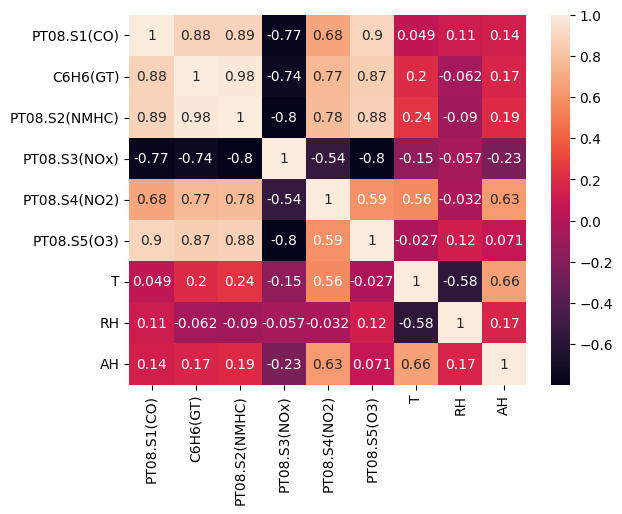

In [19]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

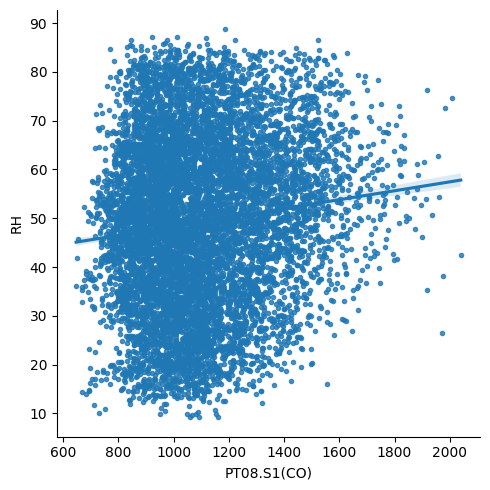

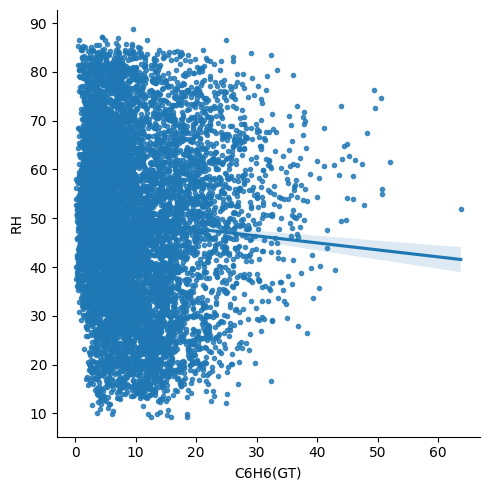

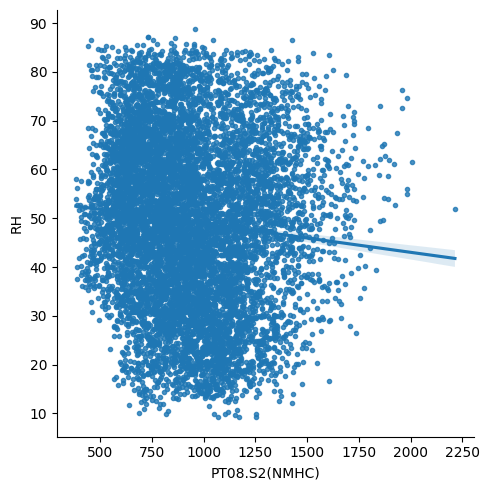

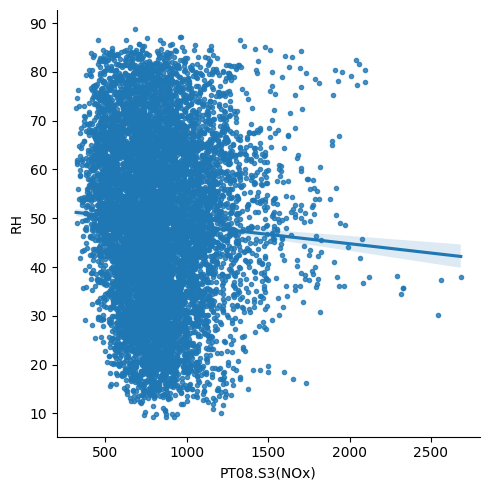

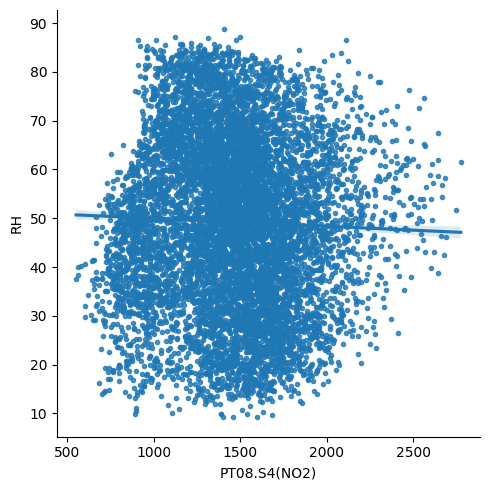

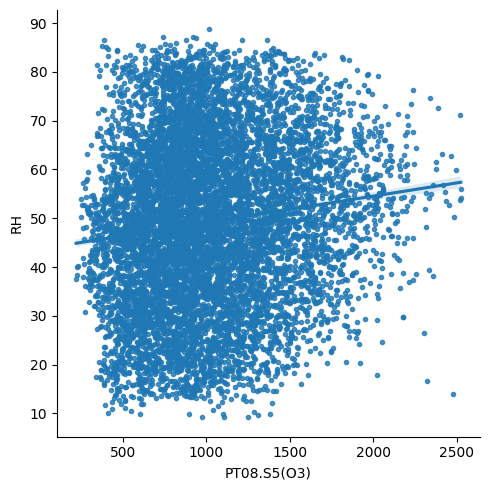

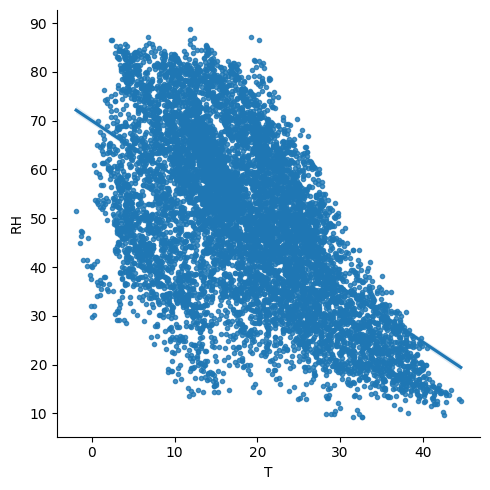

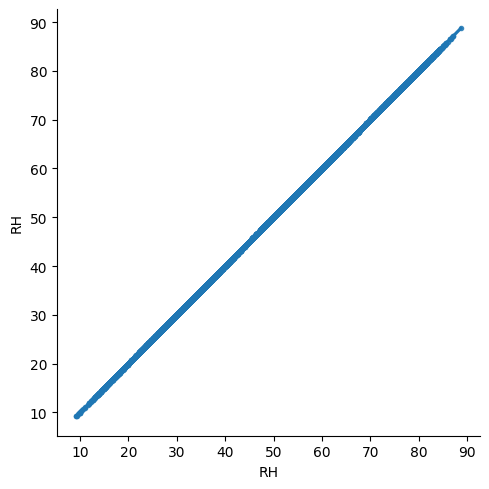

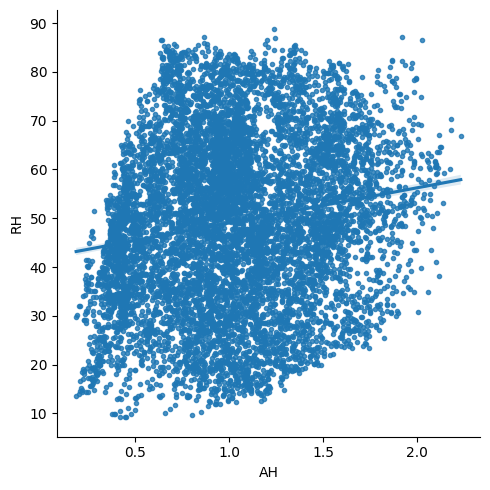

In [20]:
col_=df2.columns.tolist()[2:]
for i in df2.columns.tolist()[2:]:
    sns.lmplot(x=i,y='RH',data=df2,markers='.')

In [21]:
df2.dtypes

Date             datetime64[ns]
Time                     object
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
PT08.S3(NOx)            float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [22]:
df2.head()

,Date,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,1360.00,11.88,1045.50,1056.25,1692.00,1267.50,13.60,48.88,0.76
1,2004-03-10,19:00:00,1292.25,9.40,954.75,1173.75,1558.75,972.25,13.30,47.70,0.73
2,2004-03-10,20:00:00,1402.00,9.00,939.25,1140.00,1554.50,1074.00,11.90,53.98,0.75
3,2004-03-10,21:00:00,1375.50,9.23,948.25,1092.00,1583.75,1203.25,11.00,60.00,0.79
4,2004-03-10,22:00:00,1272.25,6.52,835.50,1205.00,1490.00,1110.00,11.15,59.58,0.79


In [23]:
df2['Date']=df2.Date.dt.month

In [24]:
df2.head()

,Date,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3,18:00:00,1360.00,11.88,1045.50,1056.25,1692.00,1267.50,13.60,48.88,0.76
1,3,19:00:00,1292.25,9.40,954.75,1173.75,1558.75,972.25,13.30,47.70,0.73
2,3,20:00:00,1402.00,9.00,939.25,1140.00,1554.50,1074.00,11.90,53.98,0.75
3,3,21:00:00,1375.50,9.23,948.25,1092.00,1583.75,1203.25,11.00,60.00,0.79
4,3,22:00:00,1272.25,6.52,835.50,1205.00,1490.00,1110.00,11.15,59.58,0.79


In [25]:
df2.dtypes

Date               int64
Time              object
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
PT08.S3(NOx)     float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [26]:
df2['Time']=pd.to_datetime(df['Time'],format='%H:%M:%S')

In [27]:
df2.dtypes

Date                      int64
Time             datetime64[ns]
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
PT08.S3(NOx)            float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [28]:
df2['Time']=df2.Time.dt.hour.astype(int)

In [29]:
df2.dtypes

Date               int64
Time               int32
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
PT08.S3(NOx)     float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [30]:
df2.head(10)

,Date,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3,18,1360.00,11.88,1045.50,1056.25,1692.00,1267.50,13.60,48.88,0.76
1,3,19,1292.25,9.40,954.75,1173.75,1558.75,972.25,13.30,47.70,0.73
2,3,20,1402.00,9.00,939.25,1140.00,1554.50,1074.00,11.90,53.98,0.75
3,3,21,1375.50,9.23,948.25,1092.00,1583.75,1203.25,11.00,60.00,0.79
4,3,22,1272.25,6.52,835.50,1205.00,1490.00,1110.00,11.15,59.58,0.79
5,3,23,1197.00,4.74,750.25,1336.50,1393.00,949.25,11.18,59.18,0.78
6,3,0,1185.00,3.62,689.50,1461.75,1332.75,732.50,11.32,56.77,0.76
7,3,1,1136.25,3.33,672.00,1453.25,1332.75,729.50,10.67,60.00,0.77
8,3,2,1094.00,2.34,608.50,1579.00,1276.00,619.50,10.65,59.67,0.76
9,3,3,1009.75,1.70,560.75,1705.00,1234.75,501.25,10.25,60.20,0.75


In [31]:
df2.isnull().sum()

Date             0
Time             0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
PT08.S3(NOx)     0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [32]:
df2.head()

,Date,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3,18,1360.00,11.88,1045.50,1056.25,1692.00,1267.50,13.60,48.88,0.76
1,3,19,1292.25,9.40,954.75,1173.75,1558.75,972.25,13.30,47.70,0.73
2,3,20,1402.00,9.00,939.25,1140.00,1554.50,1074.00,11.90,53.98,0.75
3,3,21,1375.50,9.23,948.25,1092.00,1583.75,1203.25,11.00,60.00,0.79
4,3,22,1272.25,6.52,835.50,1205.00,1490.00,1110.00,11.15,59.58,0.79


In [33]:

# nor=df2.apply(lambda iterator: ((iterator-iterator.mean())/(iterator.std())).round(2))

In [34]:
y=df2['RH'].to_numpy()
X=df2.drop('RH',1)
x=X.to_numpy()

C:\Users\DELL\AppData\Local\Temp\ipykernel_17400\3183830610.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df2.drop('RH',1)


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)

In [37]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

TRAINING MODEL

In [38]:
x_train=np.append(np.ones((x_train.shape[0],1)),x_train,axis=1)
x_train[0]

array([ 1.        , -0.09700333,  0.22454289,  0.10482764,  0.95919487,
        1.04003216, -0.50387898,  1.3191793 ,  0.25340256,  1.48365579,
        0.29096169])

In [39]:
y_train=y_train.reshape((-1,1))

In [40]:
theta=lr.fitNormal(x_train,y_train)

In [41]:
print(theta)

[[ 49.22899003]
 [  1.73596981]
 [ -0.80872585]
 [  3.53220683]
 [ -4.43451286]
 [ -1.07817173]
 [ -0.74454498]
 [  4.55742766]
 [ -0.86869941]
 [-20.74827038]
 [ 13.26496841]]


In [42]:
x_test=np.append(np.ones((x_test.shape[0],1)),x_test,axis=1)
x_test[0]

array([ 1.        , -0.68490888,  1.52595875,  0.22146655, -0.19607258,
       -0.05461995,  0.03198716,  0.34393879,  0.36816924,  0.13973225,
        0.23543322])

In [43]:
print("cost_train",lr.costFun(theta,x_train,y_train))

cost_train [18.02869825]


In [44]:
print("cost_test: ",lr.costFun(theta,x_test,y_test))

cost_test:  [20.91285926]


LINEAR REGRESSION WITHOUT REGULARIZATION

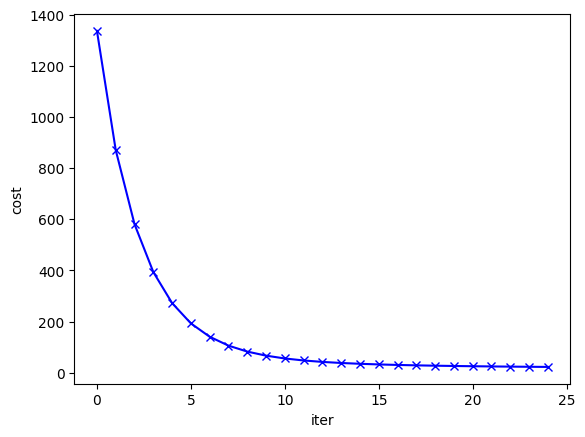

In [45]:
theta_lr,cost_lr=lr.fitGD(x_train,y_train,0.2,0,0,25)

In [47]:
print("cost_train_lr:",lr.costFun(theta_lr,x_train,y_train))

cost_train_lr: [22.13118155]


In [48]:
print(theta_lr)

[[ 49.04678606]
 [  1.9365741 ]
 [ -2.01104208]
 [  3.66254108]
 [ -2.62055948]
 [ -3.15644431]
 [ -0.48443611]
 [  2.24024217]
 [  1.65078572]
 [-16.44935857]
 [ 10.92920787]]


In [49]:
print("cost_test_lr:",lr.costFun(theta_lr,x_test,y_test))

cost_test_lr: [25.62748086]


LINEAR REGRESSION WITH L1 REGULARIZATION

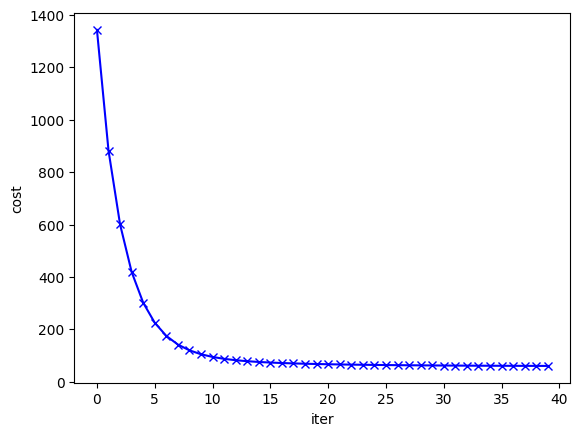

In [73]:
theta_lr1,cost_lr1=lr.fitGD(x_train,y_train,0.2,5,1,40)

In [74]:
print("cost_train_lr1:",lr.costFun(theta_lr1,x_train,y_train))

cost_train_lr1: [21.49727954]


In [75]:
print("cost_test_lr1:",lr.costFun(theta_lr1,x_test,y_test))

cost_test_lr1: [24.49843205]


LINEAR REGRESSION WITH L2 REGULARIZATION

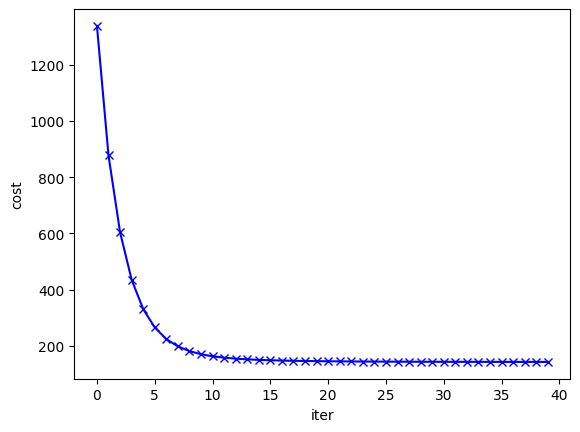

In [80]:
theta_lr2,cost_lr2=lr.fitGD(x_train,y_train,0.2,1,2,40)

In [81]:
print("cost_train_lr2:",lr.costFun(theta_lr2,x_train,y_train))

cost_train_lr2: [32.72687106]


In [82]:
print("cost_test_lr2:",lr.costFun(theta_lr2,x_test,y_test))

cost_test_lr2: [35.92504498]


LINEAR REGRESSION WITH L3 REGULARIZATION

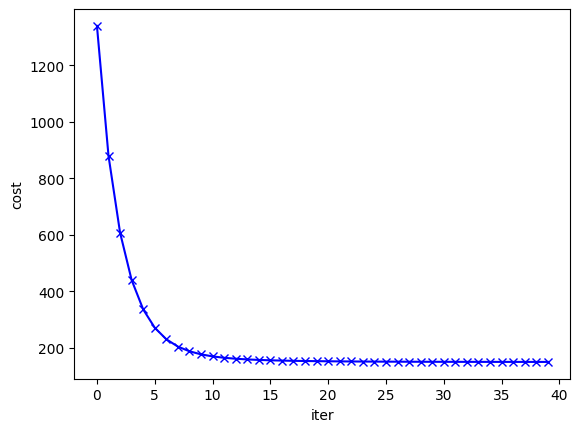

In [83]:
theta_lr3,cost_lr3=lr.fitGD(x_train,y_train,0.2,2,3,40)

In [84]:
print("cost_train_lr2:",lr.costFun(theta_lr3,x_train,y_train))

cost_train_lr2: [33.77892237]


In [85]:
print("cost_test_lr2:",lr.costFun(theta_lr3,x_test,y_test))

cost_test_lr2: [36.99791303]


CONCLUSION:
Among all the regressions L1 regression has the lowest cost for training as well as test dataset